In [ ]:
cd /mnt/data

In [ ]:
! aws s3 ls s3://olgabot-maca/

In [ ]:
! aws s3 ls s3://olgabot-maca/facs/

In [3]:
# ! aws s3 sync --quiet s3://olgabot-maca/facs/sourmash_compute_all/ /mnt/data/maca-facs-sourmash_compute_all/

In [ ]:
! aws s3 ls s3://olgabot-maca/lung_cancer/

In [ ]:
! aws s3 ls --summarize s3://olgabot-maca/lung_cancer/sourmash_v3/ | tail

In [ ]:
! aws s3 ls --summarize s3://olgabot-maca/lung_cancer/sourmash_v4/  |tail

In [ ]:
# ! aws s3 sync --quiet s3://olgabot-maca/lung_cancer/sourmash_v4/ /mnt/data/lung_cancer_sourmash_v4/

In [ ]:
! sourmash

In [ ]:
! sourmash index  -h

In [14]:
!mkdir /mnt/data/sourmash_databases

In [ ]:
# %%bash

# time sourmash index \
#     --ksize 21 \
#     --dna \
#     --traverse-directory \
#     /mnt/data/sourmash_databases/tabula-muris-dna-k21 \
#     /mnt/data/maca-facs-sourmash_compute_all/

In [1]:
# %%bash

# time sourmash index \
#     --ksize 21 \
#     --protein \
#     --traverse-directory \
#     /mnt/data/sourmash_databases/tabula-muris-protein-k21 \
    
    

In [56]:
! sourmash search -h

usage: sourmash [-h] [--traverse-directory] [-q] [--threshold THRESHOLD]
                [--save-matches SAVE_MATCHES] [--best-only] [-n NUM_RESULTS]
                [--containment] [--scaled SCALED] [-o OUTPUT] [-k KSIZE]
                [--protein] [--no-protein] [--dna] [--no-dna]
                query databases [databases ...]

positional arguments:
  query                 query signature
  databases             signatures/SBTs to search

optional arguments:
  -h, --help            show this help message and exit
  --traverse-directory  search all signatures underneath directories.
  -q, --quiet           suppress non-error output
  --threshold THRESHOLD
                        minimum threshold for reporting matches
  --save-matches SAVE_MATCHES
                        output matching signatures to this file.
  --best-only           report only the best match (with greater speed).
  -n NUM_RESULTS, --num-results NUM_RESULTS
                        number of results to report
  --c

In [ ]:
%%bash

DIR=/mnt/data/maca-facs-sourmash_search
mkdir $DIR

sourmash search --num-results 100 --csv $DIR/A1-B000610-3_56_F-1-1.csv \
    --ksize 21 --dna \
    /mnt/data/maca-facs-sourmash_compute_all/A1-B000610-3_56_F-1-1.sig \
    /mnt/data/sourmash_databases/tabula-muris-dna-k21.sbt.json

In [65]:
ls -lha /mnt/data/maca-facs-sourmash_search/

total 7.2M
drwxrwxr-x  2 ubuntu ubuntu 4.0K Sep 13 00:21 ./
drwxr-xr-x 17 ubuntu root   4.0K Sep 13 00:21 ../
-rw-rw-r--  1 ubuntu ubuntu 7.2M Sep 13 02:08 A1-B000610-3_56_F-1-1.csv


In [2]:
import pandas as pd
pd.options.display.max_colwidth = 500


search_results = pd.read_csv('/mnt/data/maca-facs-sourmash_search/A1-B000610-3_56_F-1-1.csv')
print(search_results.shape)
search_results.head()

(32210, 4)


,similarity,name,filename,md5
0,1.000000,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:A1-B000610-3_56_F-1-1,/mnt/data/sourmash_databases/tabula-muris-dna-k21.sbt.json,3413cb3e2d21ab83572f49de51dac2e6
1,0.893563,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:A13-B000610-3_56_F-1-1,/mnt/data/sourmash_databases/tabula-muris-dna-k21.sbt.json,15ca87e27d546f9b7972ff150a41480f
2,0.879294,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:E2-B000610-3_56_F-1-1,/mnt/data/sourmash_databases/tabula-muris-dna-k21.sbt.json,edacf015289b20877385cd68188bd7bd
3,0.876851,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:K14-B000610-3_56_F-1-1,/mnt/data/sourmash_databases/tabula-muris-dna-k21.sbt.json,772e252a524576ca4687ac7d6d4cd93c
4,0.872425,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:C15-B000610-3_56_F-1-1,/mnt/data/sourmash_databases/tabula-muris-dna-k21.sbt.json,ceb6145f9e786c0ebce8a4b44b767d27


In [3]:
search_results.tail()

,similarity,name,filename,md5
32205,0.080091,O4-MAA000942-3_8_M-1-1,/mnt/data/sourmash_databases/tabula-muris-dna-k21.sbt.json,7b0aa55529280f962cc25b548d023415
32206,0.080081,F11-B003277-3_39_F-1-1,/mnt/data/sourmash_databases/tabula-muris-dna-k21.sbt.json,b6848e899f347a5e3ed39cb6bc5ad5a2
32207,0.080071,cell_ontology_class:enterocyte_of_epithelium_of_large_intestine|tissue:Large_Intestine|subtissue:Proximal|free_annotation:Enterocyte_(Proximal)|cell_id:I19-MAA001872-3_39_F-1-1,/mnt/data/sourmash_databases/tabula-muris-dna-k21.sbt.json,68cc517b4556cf47080bb6c4af4f12f2
32208,0.080068,G13-MAA001868-3_38_F-1-1,/mnt/data/sourmash_databases/tabula-muris-dna-k21.sbt.json,60988646de5050554a45a60ae22908ee
32209,0.080009,C6-MAA000556-3_9_M-1-1,/mnt/data/sourmash_databases/tabula-muris-dna-k21.sbt.json,9ab3250deb350b1a8aa60b5112aa967f


In [4]:
import re

s = 'cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:C15-B000610-3_56_F-1-1'
pattern = '(\w+):([\w\d\-_]+)'

re.findall(pattern, s)

[('cell_ontology_class', 'bladder_cell'),
 ('tissue', 'Bladder'),
 ('subtissue', 'nan'),
 ('free_annotation', 'Bladder_mesenchymal_cell'),
 ('cell_id', 'C15-B000610-3_56_F-1-1')]

In [5]:
expanded = search_results.name.str.extractall(pattern)
print(expanded.shape)
expanded.head()

(144800, 2)


0                         1
  match                                               
0 0      cell_ontology_class              bladder_cell
  1                   tissue                   Bladder
  2                subtissue                       nan
  3          free_annotation  Bladder_mesenchymal_cell
  4                  cell_id     A1-B000610-3_56_F-1-1

In [6]:
expanded_index = expanded.reset_index()
print(expanded_index.shape)
expanded_index.head()

(144800, 4)


,level_0,match,0,1
0,0,0,cell_ontology_class,bladder_cell
1,0,1,tissue,Bladder
2,0,2,subtissue,nan
3,0,3,free_annotation,Bladder_mesenchymal_cell
4,0,4,cell_id,A1-B000610-3_56_F-1-1


In [7]:
annotations = expanded_index.pivot(columns=0, values=1, index='level_0')
print(annotations.shape)
annotations.head()

(28960, 5)


,cell_id,cell_ontology_class,free_annotation,subtissue,tissue
level_0,,,,,
0,A1-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder
1,A13-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder
2,E2-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder
3,K14-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder
4,C15-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder


In [8]:
annotations.tail()

,cell_id,cell_ontology_class,free_annotation,subtissue,tissue
level_0,,,,,
32197,N20-MAA001884-3_38_F-1-1,naive_B_cell,nan,B-cells,Marrow
32200,D7-MAA100039-3_11_M-1-1,hepatocyte,nan,Hepatocytes,Liver
32202,M15-MAA001869-3_38_F-1-1,epithelial_cell_of_large_intestine,Lgr5,Proximal,Large_Intestine
32203,I21-MAA001892-3_38_F-1-1,classical_monocyte,invading_monocytes,Endomucin,Lung
32207,I19-MAA001872-3_39_F-1-1,enterocyte_of_epithelium_of_large_intestine,Enterocyte_,Proximal,Large_Intestine


In [9]:
def extract_cell_annotations(name_column):
    pattern = '(\w+):([\w\d\-_]+)'
    expanded = name_column.str.extractall(pattern)
    expanded_index = expanded.reset_index()
    annotations = expanded_index.pivot(columns=0, values=1, index='level_0')
    return annotations

In [10]:
search_results_annotated = search_results.join(annotations)
print(search_results_annotated.shape)
search_results_annotated.head()

(32210, 9)


,similarity,name,filename,md5,cell_id,cell_ontology_class,free_annotation,subtissue,tissue
0,1.000000,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:A1-B000610-3_56_F-1-1,/mnt/data/sourmash_databases/tabula-muris-dna-k21.sbt.json,3413cb3e2d21ab83572f49de51dac2e6,A1-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder
1,0.893563,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:A13-B000610-3_56_F-1-1,/mnt/data/sourmash_databases/tabula-muris-dna-k21.sbt.json,15ca87e27d546f9b7972ff150a41480f,A13-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder
2,0.879294,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:E2-B000610-3_56_F-1-1,/mnt/data/sourmash_databases/tabula-muris-dna-k21.sbt.json,edacf015289b20877385cd68188bd7bd,E2-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder
3,0.876851,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:K14-B000610-3_56_F-1-1,/mnt/data/sourmash_databases/tabula-muris-dna-k21.sbt.json,772e252a524576ca4687ac7d6d4cd93c,K14-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder
4,0.872425,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:C15-B000610-3_56_F-1-1,/mnt/data/sourmash_databases/tabula-muris-dna-k21.sbt.json,ceb6145f9e786c0ebce8a4b44b767d27,C15-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder


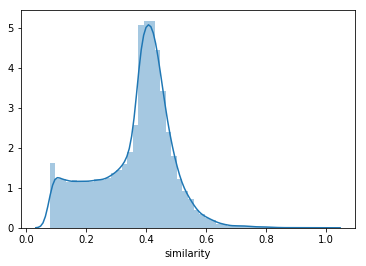

In [11]:
import seaborn as sns 
%matplotlib inline

sns.distplot(search_results_annotated.similarity)

In [12]:
search_results_annotated_subset = search_results_annotated.query('similarity > 0.6')
print(search_results_annotated_subset.shape)
search_results_annotated_subset.tail()

(528, 9)


,similarity,name,filename,md5,cell_id,cell_ontology_class,free_annotation,subtissue,tissue
523,0.600428,cell_ontology_class:T_cell|tissue:Limb_Muscle|subtissue:ForelimbandHindlimb|free_annotation:nan|cell_id:O7-D042186-3_8_M-1-1,/mnt/data/sourmash_databases/tabula-muris-dna-k21.sbt.json,d58b3b8e381fe9993b392f7861b322a2,O7-D042186-3_8_M-1-1,T_cell,nan,ForelimbandHindlimb,Limb_Muscle
524,0.600385,cell_ontology_class:mesenchymal_stem_cell_of_adipose|tissue:Fat|subtissue:GAT|free_annotation:mesenchymal_progenitor|cell_id:M7-MAA000388-3_11_M-1-1,/mnt/data/sourmash_databases/tabula-muris-dna-k21.sbt.json,a1db5c86f99b6e01084b740d541fdbe7,M7-MAA000388-3_11_M-1-1,mesenchymal_stem_cell_of_adipose,mesenchymal_progenitor,GAT,Fat
525,0.600213,cell_ontology_class:brain_pericyte|tissue:Brain_Non-Myeloid|subtissue:Cerebellum|free_annotation:nan|cell_id:C3-MAA000641-3_9_M-1-1,/mnt/data/sourmash_databases/tabula-muris-dna-k21.sbt.json,e47305ab372779d6597e86374601e440,C3-MAA000641-3_9_M-1-1,brain_pericyte,nan,Cerebellum,Brain_Non-Myeloid
526,0.600194,cell_ontology_class:endothelial_cell|tissue:Trachea|subtissue:nan|free_annotation:nan|cell_id:C14-MAA001865-3_38_F-1-1,/mnt/data/sourmash_databases/tabula-muris-dna-k21.sbt.json,8923582c93b785e1a4c7e95571c77e41,C14-MAA001865-3_38_F-1-1,endothelial_cell,nan,nan,Trachea
527,0.600035,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:O15-B000610-3_56_F-1-1,/mnt/data/sourmash_databases/tabula-muris-dna-k21.sbt.json,427b32b0b57eee9877898e41585d6056,O15-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder


In [13]:
search_results_annotated_subset = search_results_annotated.query('similarity > 0.8')
print(search_results_annotated_subset.shape)
search_results_annotated_subset.tail()

(24, 9)


,similarity,name,filename,md5,cell_id,cell_ontology_class,free_annotation,subtissue,tissue
19,0.808605,cell_ontology_class:skeletal_muscle_satellite_cell|tissue:Limb_Muscle|subtissue:ForelimbandHindlimb|free_annotation:nan|cell_id:C15-B002769-3_39_F-1-1,/mnt/data/sourmash_databases/tabula-muris-dna-k21.sbt.json,f2570bbc14ad391da8d391280e5cf051,C15-B002769-3_39_F-1-1,skeletal_muscle_satellite_cell,nan,ForelimbandHindlimb,Limb_Muscle
20,0.805943,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:N3-D041914-3_8_M-1-1,/mnt/data/sourmash_databases/tabula-muris-dna-k21.sbt.json,d40019c2bb816245fd73cd6a04f7faa5,N3-D041914-3_8_M-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder
21,0.803120,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:C3-D041914-3_8_M-1-1,/mnt/data/sourmash_databases/tabula-muris-dna-k21.sbt.json,0bbbcdf94354672282eaf25ee98290c6,C3-D041914-3_8_M-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder
22,0.802825,F3-D041914-3_8_M-1-1,/mnt/data/sourmash_databases/tabula-muris-dna-k21.sbt.json,b07761d7d85f9f89926551781577d979,NaN,NaN,NaN,NaN,NaN
23,0.801559,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:B4-D041914-3_8_M-1-1,/mnt/data/sourmash_databases/tabula-muris-dna-k21.sbt.json,31757be8557d2910bda14528ac103927,B4-D041914-3_8_M-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder


In [59]:
%%bash

sourmash search --num-results 10 --csv  --ksize 21 --dna \
    /mnt/data/maca-facs-sourmash_compute_all/A1-B000610-3_56_F-1-1.sig \
    /mnt/data/sourmash_databases/tabula-muris-dna-k21.sbt.json


32210 matches; showing first 10:
similarity   match
----------   -----
100.0%       cell_ontology_class:bladder_cell|tissue:Bladder|subtissue...
 89.4%       cell_ontology_class:bladder_cell|tissue:Bladder|subtissue...
 87.9%       cell_ontology_class:bladder_cell|tissue:Bladder|subtissue...
 87.7%       cell_ontology_class:bladder_cell|tissue:Bladder|subtissue...
 87.2%       cell_ontology_class:bladder_cell|tissue:Bladder|subtissue...
 85.4%       cell_ontology_class:bladder_cell|tissue:Bladder|subtissue...
 84.7%       cell_ontology_class:bladder_cell|tissue:Bladder|subtissue...
 84.0%       cell_ontology_class:bladder_cell|tissue:Bladder|subtissue...
 83.4%       cell_ontology_class:bladder_cell|tissue:Bladder|subtissue...
 83.3%       cell_ontology_class:bladder_cell|tissue:Bladder|subtissue...


loaded query: cell_ontology_class:bladder_ce... (k=21, DNA)
loaded 1 databases.


In [103]:
%%bash


DIR=/mnt/data/maca-facs-sourmash_search
mkdir $DIR

sourmash search --num-results 10 --output $DIR/A1-B000610-3_56_F-1-1_k27.csv \
    --threshold 0.8 --ksize 27 --dna \
    /mnt/data/maca-facs-sourmash_compute_all/A1-B000610-3_56_F-1-1.sig \
    /mnt/data/sourmash_databases/tabula-muris-dna-k21.sbt.json

mkdir: cannot create directory ‘/mnt/data/maca-facs-sourmash_search’: File exists
loaded query: cell_ontology_class:bladder_ce... (k=27, DNA)
ksize on tree '/mnt/data/sourmash_databases/tabula-muris-dna-k21.sbt.json' is 21;
this is different from query ksize of 27.


In [111]:
%%bash

DIR=/mnt/data/maca-facs-sourmash_search


sourmash search --ksize 21 --threshold 0.5 \
    --output $DIR/A1-B000610-3_56_F-1-1_protein.csv \
    --protein \
    /mnt/data/maca-facs-sourmash_compute_all/A1-B000610-3_56_F-1-1.sig \
    /mnt/data/sourmash_databases/tabula-muris-protein-k21.sbt.json


6316 matches; showing first 3:
similarity   match
----------   -----
100.0%       cell_ontology_class:bladder_cell|tissue:Bladder|subtissue...
 84.0%       cell_ontology_class:bladder_cell|tissue:Bladder|subtissue...
 83.7%       cell_ontology_class:bladder_cell|tissue:Bladder|subtissue...


loaded query: cell_ontology_class:bladder_ce... (k=21, protein)
loaded 1 databases.


In [109]:
ls /mnt/data/sourmash_databases/

tabula-muris-dna-k21.sbt.json  tabula-muris-protein-k21.sbt.json


Meanwhile, outside of the notebook:

    aws s3 cp --quiet --recursive s3://olgabot-maca/facs/sourmash_index_all /mnt/data/maca-facs-sourmash_index_all/

## Search for this cell across all databases

In [ ]:
import itertools

ksizes = 21, 27, 33, 51
sequences = 'protein', 'dna'
abundance_flags = '--ignore-abundance', ''

output_dir = '/mnt/data/maca-facs-sourmash_search'

cell_id = 'A1-B000610-3_56_F-1-1'

query = f'/mnt/data/maca-facs-sourmash_compute_all/{cell_id}.sig'
db_name = 'tabula-muris-k{ksize}-{seq}'
db_template = f'/mnt/data/maca-facs-sourmash_index_all/{db_name}/{db_name}/{db_name}.sbt.json'

for ksize, seq, flag in itertools.product(ksizes, sequences, abundance_flags):
    print(f'ksize: {ksize}, seq: {seq}')
    
    database = db_template.format(ksize=ksize, seq=seq)
    ! ls -lha $database
    abundance = 'ignore_abundance' if flag else "include_abundance"
    prefix = f'{output_dir}/{cell_id}_k{ksize}-{seq}-{abundance}'
    csv = f'{prefix}.csv'
    out = f'{prefix}.out'
    err = f'{prefix}.err'
    ! time sourmash search --output $csv --num-results 10 $flag --ksize $ksize --$seq $query $database >$out 2>$err

ksize: 21, seq: protein
-rw-rw-r-- 1 ubuntu ubuntu 8.8M Sep 13 15:36 /mnt/data/maca-facs-sourmash_index_all/tabula-muris-k21-protein/tabula-muris-k21-protein/tabula-muris-k21-protein.sbt.json
ksize: 21, seq: protein
-rw-rw-r-- 1 ubuntu ubuntu 8.8M Sep 13 15:36 /mnt/data/maca-facs-sourmash_index_all/tabula-muris-k21-protein/tabula-muris-k21-protein/tabula-muris-k21-protein.sbt.json
ksize: 21, seq: dna
-rw-rw-r-- 1 ubuntu ubuntu 8.8M Sep 13 15:44 /mnt/data/maca-facs-sourmash_index_all/tabula-muris-k21-dna/tabula-muris-k21-dna/tabula-muris-k21-dna.sbt.json
ksize: 21, seq: dna
-rw-rw-r-- 1 ubuntu ubuntu 8.8M Sep 13 15:44 /mnt/data/maca-facs-sourmash_index_all/tabula-muris-k21-dna/tabula-muris-k21-dna/tabula-muris-k21-dna.sbt.json
ksize: 27, seq: protein
-rw-rw-r-- 1 ubuntu ubuntu 13M Sep 13 16:08 /mnt/data/maca-facs-sourmash_index_all/tabula-muris-k27-protein/tabula-muris-k27-protein/tabula-muris-k27-protein.sbt.json
ksize: 27, seq: protein
-rw-rw-r-- 1 ubuntu ubuntu 13M Sep 13 16:08 /mnt/

The protein indexes are HUGE which is probably why these are failing

```
 Wed 19 Sep - 16:04  /mnt/data/maca-facs-sourmash_index_all 
  du -h --max-depth 1 .
12G     ./tabula-muris-k27-dna
14G     ./tabula-muris-k33-protein
12G     ./tabula-muris-k21-protein
19G     ./tabula-muris-k27-protein
13G     ./tabula-muris-k51-protein
7.9G    ./tabula-muris-k33-dna
7.5G    ./tabula-muris-k21-dna
7.8G    ./tabula-muris-k51-dna
92G     .
```

In [34]:
ls -lha $output_dir

total 49M
drwxrwxr-x  2 ubuntu ubuntu 4.0K Sep 17 18:31 ./
drwxr-xr-x 24 ubuntu root   4.0K Sep 15 01:51 ../
-rw-rw-r--  1 ubuntu ubuntu 7.2M Sep 13 02:08 A1-B000610-3_56_F-1-1.csv
-rw-rw-r--  1 ubuntu ubuntu 8.8M Sep 15 06:48 A1-B000610-3_56_F-1-1_k21-dna.csv
-rw-rw-r--  1 ubuntu ubuntu    0 Sep 17 17:31 A1-B000610-3_56_F-1-1_k21-protein.csv
-rw-rw-r--  1 ubuntu ubuntu 1.8K Sep 17 18:31 A1-B000610-3_56_F-1-1_k21-protein.err
-rw-rw-r--  1 ubuntu ubuntu    1 Sep 17 18:31 A1-B000610-3_56_F-1-1_k21-protein.out
-rw-rw-r--  1 ubuntu ubuntu    0 Sep 13 20:32 A1-B000610-3_56_F-1-1_k27.csv
-rw-rw-r--  1 ubuntu ubuntu  14M Sep 15 13:45 A1-B000610-3_56_F-1-1_k27-dna.csv
-rw-rw-r--  1 ubuntu ubuntu    0 Sep 17 18:31 A1-B000610-3_56_F-1-1_k27-protein.csv
-rw-rw-r--  1 ubuntu ubuntu 2.3K Sep 17 18:31 A1-B000610-3_56_F-1-1_k27-protein.err
-rw-rw-r--  1 ubuntu ubuntu    1 Sep 17 18:31 A1-B000610-3_56_F-1-1_k27-protein.out
-rw-rw-r--  1 ubuntu ubuntu 9.2M Sep 15 20:10 A1-B000610-3_56_F-1-1_k33-dna.csv

In [35]:
! cat $output_dir/A1-B000610-3_56_F-1-1_k21-protein.err

loaded query: cell_ontology_class:bladder_ce... (k=21, protein)
loaded 1 databases.
Traceback (most recent call last):
  File "/home/ubuntu/anaconda/bin/sourmash", line 11, in <module>
    load_entry_point('sourmash==2.0.0a9', 'console_scripts', 'sourmash')()
  File "/home/ubuntu/anaconda/lib/python3.6/site-packages/sourmash/__main__.py", line 77, in main
    cmd(sys.argv[2:])
  File "/home/ubuntu/anaconda/lib/python3.6/site-packages/sourmash/commands.py", line 789, in search
    args.best_only)
  File "/home/ubuntu/anaconda/lib/python3.6/site-packages/sourmash/search.py", line 47, in search_databases
    for leaf in tree.find(search_fn, query, threshold):
  File "/home/ubuntu/anaconda/lib/python3.6/site-packages/sourmash/sbt.py", line 197, in find
    if search_fn(node_g, *args):
  File "/home/ubuntu/anaconda/lib/python3.6/site-packages/sourmash/sbtmh.py", line 131, in search_minhashes
    score = _max_jaccard_underneath_internal_node(node, mins)
  File "/home/ubuntu/anaconda/lib/pyth

In [15]:
! head $output_dir/*k*-*csv

head: cannot open '/*k*-*csv' for reading: No such file or directory


In [ ]:
! grep protein /mnt/data/lung_cancer_sourmash_v4/*| head

In [51]:
!sourmash search -h

usage: sourmash [-h] [--traverse-directory] [-q] [--threshold THRESHOLD]
                [--save-matches SAVE_MATCHES] [--best-only] [-n NUM_RESULTS]
                [--containment] [--scaled SCALED] [-o OUTPUT] [-k KSIZE]
                [--protein] [--no-protein] [--dna] [--no-dna]
                query databases [databases ...]

positional arguments:
  query                 query signature
  databases             signatures/SBTs to search

optional arguments:
  -h, --help            show this help message and exit
  --traverse-directory  search all signatures underneath directories.
  -q, --quiet           suppress non-error output
  --threshold THRESHOLD
                        minimum threshold for reporting matches
  --save-matches SAVE_MATCHES
                        output matching signatures to this file.
  --best-only           report only the best match (with greater speed).
  -n NUM_RESULTS, --num-results NUM_RESULTS
                        number of results to report
  --c

In [45]:
%%bash

sourmash search --ksize 21 --protein \
    --no-dna \
    /mnt/data/lung_cancer_sourmash_v3/A10_B000420_S82.signature \
    /mnt/data/sourmash_databases/tabula-muris-protein-k21.sbt.json

Process is interrupted.


In [52]:
! sourmash categorize -h

usage: sourmash [-h] [-q] [-k KSIZE] [--threshold THRESHOLD]
                [--traverse-directory] [--protein] [--no-protein] [--dna]
                [--no-dna] [--csv CSV] [--load-csv LOAD_CSV]
                sbt_name queries [queries ...]

positional arguments:
  sbt_name              name of SBT to load
  queries               list of signatures to categorize

optional arguments:
  -h, --help            show this help message and exit
  -q, --quiet           suppress non-error output
  -k KSIZE, --ksize KSIZE
  --threshold THRESHOLD
  --traverse-directory
  --protein             choose a protein signature (default: False)
  --no-protein          do not choose a protein signature
  --dna                 choose a DNA signature (default: True)
  --no-dna              do not choose a DNA signature
  --csv CSV
  --load-csv LOAD_CSV


In [50]:
%%bash

sourmash categorize --ksize 21 --protein \
    --no-dna \
    /mnt/data/sourmash_databases/tabula-muris-protein-k21.sbt.json \
    /mnt/data/lung_cancer_sourmash_v3/A10_B000420_S82.signature


found 1 files to query
loaded query: A10_B000420_S82... (k=21, protein)
Traceback (most recent call last):
  File "/home/ubuntu/anaconda/bin/sourmash", line 11, in <module>
    load_entry_point('sourmash==2.0.0a9', 'console_scripts', 'sourmash')()
  File "/home/ubuntu/anaconda/lib/python3.6/site-packages/sourmash/__main__.py", line 77, in main
    cmd(sys.argv[2:])
  File "/home/ubuntu/anaconda/lib/python3.6/site-packages/sourmash/commands.py", line 881, in categorize
    results.append((query.similarity(leaf.data), leaf.data))
  File "/home/ubuntu/anaconda/lib/python3.6/site-packages/sourmash/signature.py", line 111, in similarity
    return self.minhash.similarity(other.minhash, ignore_abundance)
  File "sourmash/_minhash.pyx", line 352, in sourmash._minhash.MinHash.similarity
  File "sourmash/_minhash.pyx", line 384, in sourmash._minhash.MinHash.__iadd__
ValueError: mismatch in max_hash; comparison fail


In [ ]:
range(3)